# objectives - model different scenarios for schools and observe predicted changed in student scores 

- load model
- retrain model 
- select schools to model 
- generate alternative key feature values to model 
- observe adjusted score predictions 

In [1]:

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

## Load Random Forest Model

In [2]:
expected_model_version = '1.0'
model_path = '../../models/11th_grade_scoring_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [3]:
model.version

'1.0'

In [12]:
df = pd.read_csv('../../data/model/XY_final.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
labels = df[['County_Name', 'District_Name', 'School_Name']].copy()
df.shape

(52665, 63)

In [13]:
X = df[model.X_columns]
print(X.shape)
y = df['Mean Scale Score']
print(y.shape)

(52665, 59)
(52665,)


# Train on all data 

In [14]:
model.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=77))])

In [20]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Check scores of model 

In [21]:
results = cross_validate(model, X, y , 
            scoring=('r2','explained_variance', 'neg_mean_absolute_error'),cv=5)
results
# scores = results['test_score']
# np.mean(scores), np.std(scores)

{'fit_time': array([30.90729809, 27.80066085, 32.40649295, 38.55171394, 34.59647393]),
 'score_time': array([0.25576282, 0.20637321, 0.31191611, 0.22161794, 0.207551  ]),
 'test_r2': array([0.44122486, 0.46869534, 0.70117561, 0.53725136, 0.66342134]),
 'test_explained_variance': array([0.44605376, 0.47573875, 0.70237637, 0.53785751, 0.66386569]),
 'test_neg_mean_absolute_error': array([-46.81964751, -38.19288311, -32.88053137, -37.58389438,
        -37.35770791])}

In [ ]:
results = cross_validate(model, X, y , cv=5)
scores = results['test_score']
np.mean(scores)

# Confirm feature importance 

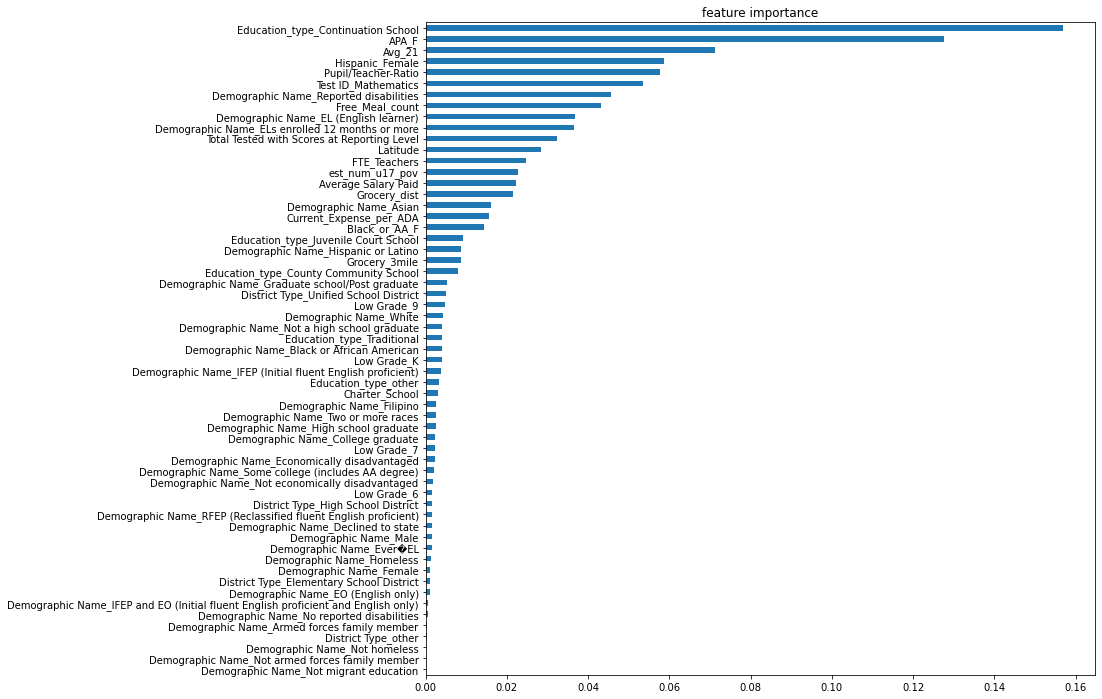

In [9]:
names = zip(model.X_columns,model.named_steps.randomforestregressor.feature_importances_)
names
fig, ax = plt.subplots(figsize=(12,12))
imps = model.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=model.X_columns).sort_values()
plt.title('feature importance')
fig = rf_feat_imps.plot(kind='barh')
plt.show()

In [61]:
'Total Tested with Scores at Reporting Level',
'Charter_School',
'Free_Meal_count',
'Latitude',
'FTE_Teachers',
'Pupil/Teacher-Ratio',
'Hispanic_Female',
'Black_or_AA_F',
'APA_F',
'Avg_21',
'Average Salary Paid',
'Current_Expense_per_ADA',
'est_num_u17_pov',
'Grocery_3mile',
'Grocery_dist',
'Low Grade_6',
'Low Grade_7',
'Low Grade_9',
'Low Grade_K',
'Test ID_Mathematics',

('Test ID_Mathematics',)

#  Function to predict score change 

In [175]:
# original 
def predict_change( model,df,school,demographic,features, deltas):
    """Isolate row of df and predict change in scores due to feature change"""
    school=df[df['School_Name'].str.startswith(school)]
    group = 'Demographic Name_'+demographic
    row = school[school[group]==1]


    row = row.drop(['Mean Scale Score', 'County_Name','District_Name', 'School_Name'],axis=1)
     
    adj_school = row.copy()
   
    for f,d in zip(features, deltas):
        adj_school[f] += d

    return model.predict(row).item(),(model.predict(adj_school).item() - model.predict(row).item()) ,model.predict(adj_school).item()

In [173]:
oceana.head()

,Total Tested with Scores at Reporting Level,Charter_School,Free_Meal_count,Latitude,FTE_Teachers,Pupil/Teacher-Ratio,Hispanic_Female,Black_or_AA_F,APA_F,Avg_21,...,District Type_other,Education_type_Continuation School,Education_type_County Community School,Education_type_Juvenile Court School,Education_type_Traditional,Education_type_other,Mean Scale Score,County_Name,District_Name,School_Name
42665,50.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2671.3,San Mateo,Jefferson Union High,Oceana High
42666,29.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2691.4,San Mateo,Jefferson Union High,Oceana High
42667,21.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2643.6,San Mateo,Jefferson Union High,Oceana High
42668,46.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2687.4,San Mateo,Jefferson Union High,Oceana High
42669,50.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2671.3,San Mateo,Jefferson Union High,Oceana High


In [245]:
teacher_delta = [i for i in range(0,50,5)]

score_deltas = [predict_change(model,df,
                            'Oceana','Filipino',
#                                "Graduate school/Post graduate",
                            ['FTE_Teachers'],[delta]) for delta in teacher_delta]
score_deltas

[0.0,
 -0.08701298701271298,
 0.9727272727268428,
 2.4948051948049397,
 2.4948051948049397,
 2.60909090909081,
 2.60909090909081,
 1.788311688311751,
 1.4610389610388665,
 1.4610389610388665]

In [77]:
# model.X_columns

In [26]:
teacher_neg = [i for i in range(-5,-50,-5)]
teacher_neg

[-5, -10, -15, -20, -25, -30, -35, -40, -45]

In [246]:

score_deltas = [predict_change(model,df,
                            'Oceana','Filipino',
                            ['FTE_Teachers'],[delta]) for delta in teacher_neg]
score_deltas

[-0.6181818181817107,
 -1.632467532467217,
 -1.632467532467217,
 -3.4168831168826728,
 -7.064935064935071,
 -12.727272727272975,
 -12.727272727272975,
 -12.727272727272975,
 -12.727272727272975]

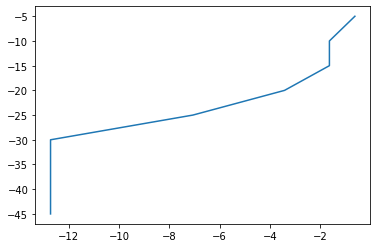

In [247]:
plt.plot(score_deltas,teacher_neg)

In [ ]:
score_deltas = [predict_change(model,df,
                            'Oceana','Filipino',
                            ['FTE_Teachers'],[delta]) for delta in teacher_neg]

In [28]:
housing_neg = [i for i in range(-10000,-1000000,-100000)]
housing_neg

[-10000,
 -110000,
 -210000,
 -310000,
 -410000,
 -510000,
 -610000,
 -710000,
 -810000,
 -910000]

In [133]:
df.columns

Index(['Total Tested with Scores at Reporting Level', 'Charter_School',
       'Free_Meal_count', 'Latitude', 'FTE_Teachers', 'Pupil/Teacher-Ratio',
       'Hispanic_Female', 'Black_or_AA_F', 'APA_F', 'Avg_21',
       'Average Salary Paid', 'Current_Expense_per_ADA', 'est_num_u17_pov',
       'Grocery_3mile', 'Grocery_dist', 'Low Grade_6', 'Low Grade_7',
       'Low Grade_9', 'Low Grade_K', 'Test ID_Mathematics',
       'Demographic Name_Armed forces family member', 'Demographic Name_Asian',
       'Demographic Name_Black or African American',
       'Demographic Name_College graduate',
       'Demographic Name_Declined to state',
       'Demographic Name_EL (English learner)',
       'Demographic Name_ELs enrolled 12 months or more',
       'Demographic Name_EO (English only)',
       'Demographic Name_Economically disadvantaged',
       'Demographic Name_Ever�EL', 'Demographic Name_Female',
       'Demographic Name_Filipino',
       'Demographic Name_Graduate school/Post graduate',
 

In [145]:
df[(df['School_Name'].str.startswith('Jefferson High'))&
   (df['Demographic Name_Filipino']==1)& (df['Test ID_Mathematics']==0)][['Demographic Name_Armed forces family member', 'Demographic Name_Asian',
       'Demographic Name_Black or African American',
       'Demographic Name_College graduate',
       'Demographic Name_Declined to state',
       'Demographic Name_EL (English learner)',
       'Demographic Name_ELs enrolled 12 months or more',
       'Demographic Name_EO (English only)',
       'Demographic Name_Economically disadvantaged',
       'Demographic Name_Ever�EL', 'Demographic Name_Female',
       'Demographic Name_Filipino',
       'Demographic Name_Graduate school/Post graduate',
       'Demographic Name_High school graduate',
       'Demographic Name_Hispanic or Latino', 'Demographic Name_Homeless',
       'Demographic Name_IFEP (Initial fluent English proficient)',
                                                                          
       'Demographic Name_IFEP and EO (Initial fluent English proficient and English only)',
            'Demographic Name_Male', 'Demographic Name_No reported disabilities',
       'Demographic Name_Not a high school graduate',
       'Demographic Name_Not armed forces family member',
       'Demographic Name_Not economically disadvantaged',
       'Demographic Name_Not homeless',
       'Demographic Name_Not migrant education',
       'Demographic Name_RFEP (Reclassified fluent English proficient)',
       'Demographic Name_Reported disabilities',
       'Demographic Name_Some college (includes AA degree)',
       'Demographic Name_Two or more races', 'Demographic Name_White',
       'District Type_Elementary School District',
       'District Type_High School District',
       'District Type_Unified School District', 'District Type_other',
       'Education_type_Continuation School',
       'Education_type_County Community School',
       'Education_type_Juvenile Court School', 'Education_type_Traditional',
       'Education_type_other'  ]].T

,42616,42631,42634
Demographic Name_Armed forces family member,0.0,0.0,0.0
Demographic Name_Asian,0.0,0.0,0.0
Demographic Name_Black or African American,0.0,0.0,0.0
Demographic Name_College graduate,0.0,0.0,0.0
Demographic Name_Declined to state,0.0,0.0,0.0
Demographic Name_EL (English learner),0.0,0.0,0.0
Demographic Name_ELs enrolled 12 months or more,0.0,0.0,0.0
Demographic Name_EO (English only),0.0,0.0,0.0
Demographic Name_Economically disadvantaged,0.0,0.0,0.0
Demographic Name_Ever�EL,0.0,0.0,0.0


## Second function 

In [224]:
def predict_change( model,df,school,demographic,features, deltas):
    """Isolate row of df and predict change in scores due to feature change"""
    school=df[df['School_Name'].str.startswith(school)]
    group = 'Demographic Name_'+demographic
    row = school[school[group]==1]


    row = row.drop(['Mean Scale Score', 'County_Name','District_Name', 'School_Name'],axis=1)
    row = row.iloc[0].copy()
    adj_school = row.copy()
    adj_school = pd.DataFrame(adj_school)
    
    for f,d in zip(features, deltas):
        adj_school.loc[f] += d
    return (model.predict(adj_school.values.reshape(1, -1)).item() - model.predict(row.values.reshape(1,-1)).item())


In [243]:
# negative 
score_deltas = [predict_change(model,df,
                            'Jefferson High','Filipino',
                            ['Avg_21'],[delta]) for delta in housing_delta]
score_deltas

[0.0,
 0.5571428571429351,
 1.0558441558432605,
 4.716883116882855,
 0.8662337662335631,
 0.8662337662335631,
 0.8662337662335631,
 -4.4610389610388665,
 -4.4610389610388665,
 -4.4610389610388665]

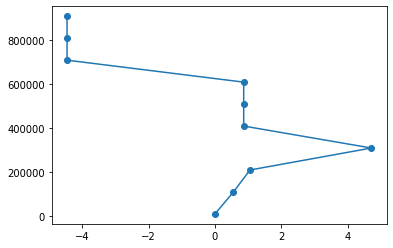

In [244]:
plt.plot(score_deltas,housing_delta, 'o-')

In [241]:
# negative 
score_deltas = [predict_change(model,df,
                            'Westmoor High','Filipino',
                            ['Avg_21'],[delta]) for delta in housing_delta]
score_deltas

[0.0,
 16.13246753246858,
 16.13246753246858,
 16.13246753246858,
 31.629870129870596,
 31.629870129870596,
 31.629870129870596,
 31.629870129870596,
 31.629870129870596,
 31.629870129870596]

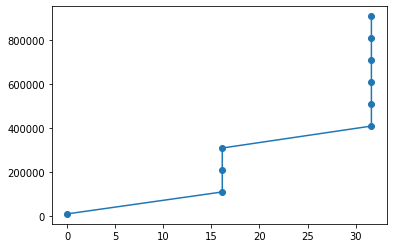

In [242]:
plt.plot(score_deltas,housing_delta, 'o-')

In [238]:
# positive 
housing_delta = [i for i in range(10000,1000000,100000)]

score_deltas = [predict_change(model,df,
                            'Oceana','Filipino',
                            ['Avg_21'],[delta]) for delta in housing_delta]
score_deltas

[0.0,
 0.8077922077923176,
 18.797402597401287,
 20.132467532465398,
 21.812987012985104,
 27.49090909090728,
 27.49090909090728,
 27.49090909090728,
 27.49090909090728,
 27.49090909090728]

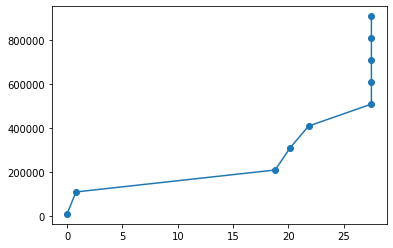

In [240]:
plt.plot(score_deltas,housing_delta, 'o-')

In [118]:
# negative 
score_deltas = [predict_change(model,df,
                            'Oceana','Filipino',
                            ['Avg_21'],[delta]) for delta in housing_neg]
score_deltas

[(2645.9896103896126, 0.0, 2645.9896103896126),
 (2645.9896103896126, -0.15454545454576873, 2645.835064935067),
 (2645.9896103896126, -0.3168831168836732, 2645.672727272729),
 (2645.9896103896126, -0.5740259740264264, 2645.415584415586),
 (2645.9896103896126, -1.781818181818835, 2644.207792207794),
 (2645.9896103896126, -13.538961038962498, 2632.45064935065),
 (2645.9896103896126, -17.22207792208019, 2628.7675324675324),
 (2645.9896103896126, -24.933766233768438, 2621.055844155844),
 (2645.9896103896126, -25.148051948053762, 2620.841558441559),
 (2645.9896103896126, -35.0337662337688, 2610.955844155844)]

In [30]:
# positive 
housing_delta = [i for i in range(10000,1000000,100000)]

score_deltas = [predict_change(model,df,
                            'Oceana','Filipino',
                            ['Avg_21'],[delta]) for delta in housing_delta]
score_deltas

[0.0,
 0.8077922077923176,
 18.797402597401287,
 20.132467532465398,
 21.812987012985104,
 27.49090909090728,
 27.49090909090728,
 27.49090909090728,
 27.49090909090728,
 27.49090909090728]

In [32]:
change = predict_change(model,df,'Oceana','Filipino',['Avg_21','FTE_Teachers'],[-410000,-10])
change

-3.95064935065011

## Refit model with all data 


plot compare key features to be adjusted 

use predict increase to generate alternative scores due to change in model features 

graph changes in scores due to adjusted features 



In [53]:
df[df['District_Name'].str.startswith('San')]['District_Name'].unique()

array(['San Ramon Valley Unified', 'Sanger Unified', 'San Marino Unified',
       'Santa Monica-Malibu Unified', 'San Gabriel Unified',
       'San Rafael City High', 'Santa Ana Unified', 'San Jacinto Unified',
       'San Jacinto Valley Academy', 'San Juan Unified',
       'San Benito High', 'San Bernardino County Office of Educatio',
       'San Bernardino City Unified',
       'San Diego County Office of Education',
       'San Diego Workforce Innovation High', 'San Diego Virtual',
       'San Diego Unified', 'San Dieguito Union High',
       'San Diego Mission Academy',
       'San Joaquin County Office of Education',
       'San Luis Obispo County Office of Educati',
       'San Luis Coastal Unified',
       'Santa Clara County Office of Education', 'San Jose Unified',
       'Santa Clara Unified', 'San Lorenzo Valley Unified',
       'Santa Cruz City High'], dtype=object)

In [54]:
df[df['District_Name'].str.startswith('Jef')]['District_Name'].unique()

array(['Jefferson Union High'], dtype=object)

In [58]:
df[df['County_Name'].str.startswith('San Mateo')]['School_Name'].unique()

array(['Oxford Day Academy', 'California Virtual Academy San Mateo',
       'Jefferson High', 'Oceana High', 'Terra Nova High',
       'Westmoor High', 'Baden High (Continuation)', 'El Camino High',
       'South San Francisco High'], dtype=object)

In [125]:
df[(df['District_Name'].str.startswith('Jef'))
   &(df['Demographic Name_Filipino']==1)]['School_Name'].value_counts()

Westmoor High     6
Jefferson High    6
Oceana High       1
Name: School_Name, dtype: int64

In [61]:
# df['District_Name'].unique()

In [97]:
oceana = df[df['School_Name'].str.startswith('Oceana')]
oceana

,Total Tested with Scores at Reporting Level,Charter_School,Free_Meal_count,Latitude,FTE_Teachers,Pupil/Teacher-Ratio,Hispanic_Female,Black_or_AA_F,APA_F,Avg_21,...,District Type_other,Education_type_Continuation School,Education_type_County Community School,Education_type_Juvenile Court School,Education_type_Traditional,Education_type_other,Mean Scale Score,County_Name,District_Name,School_Name
42665,50.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2671.3,San Mateo,Jefferson Union High,Oceana High
42666,29.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2691.4,San Mateo,Jefferson Union High,Oceana High
42667,21.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2643.6,San Mateo,Jefferson Union High,Oceana High
42668,46.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2687.4,San Mateo,Jefferson Union High,Oceana High
42669,50.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2671.3,San Mateo,Jefferson Union High,Oceana High
42670,11.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2663.3,San Mateo,Jefferson Union High,Oceana High
42671,50.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2671.3,San Mateo,Jefferson Union High,Oceana High
42672,50.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2671.3,San Mateo,Jefferson Union High,Oceana High
42673,11.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2625.6,San Mateo,Jefferson Union High,Oceana High
42674,11.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2713.0,San Mateo,Jefferson Union High,Oceana High


In [98]:
oceana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 42665 to 42692
Data columns (total 63 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Total Tested with Scores at Reporting Level                                        28 non-null     float64
 1   Charter_School                                                                     28 non-null     int64  
 2   Free_Meal_count                                                                    28 non-null     float64
 3   Latitude                                                                           28 non-null     float64
 4   FTE_Teachers                                                                       28 non-null     float64
 5   Pupil/Teacher-Ratio                                                                28 non-null     fl

In [95]:
oceana[oceana['Demographic Name_Filipino']==1][:20]

,Total Tested with Scores at Reporting Level,Charter_School,Free_Meal_count,Latitude,FTE_Teachers,Pupil/Teacher-Ratio,Hispanic_Female,Black_or_AA_F,APA_F,Avg_21,...,District Type_other,Education_type_Continuation School,Education_type_County Community School,Education_type_Juvenile Court School,Education_type_Traditional,Education_type_other,Mean Scale Score,County_Name,District_Name,School_Name
42673,11.0,0,113.0,37.6387,31.65,18.83,71.0,1.0,98.0,1274587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2625.6,San Mateo,Jefferson Union High,Oceana High


In [13]:
type(oceana[oceana['Demographic Name_Filipino']==1])

pandas.core.frame.DataFrame

In [110]:
oceana[oceana['Demographic Name_Filipino']==1].loc[:,'Total Tested with Scores at Reporting Level':'Mean Scale Score'].T

,42673
Total Tested with Scores at Reporting Level,1.100000e+01
Charter_School,0.000000e+00
Free_Meal_count,1.130000e+02
Latitude,3.763870e+01
FTE_Teachers,3.165000e+01
Pupil/Teacher-Ratio,1.883000e+01
Hispanic_Female,7.100000e+01
Black_or_AA_F,1.000000e+00
APA_F,9.800000e+01
Avg_21,1.274587e+06
